# LFV Higgs decays in Minimal SeeSaw model

In this model the couplings that allows LFVHD are given by 

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$h W^{+\mu} W^{-\nu}$|$i g m_{W} g_{\mu \nu}$|$h G_{W}^{+} G_{W}^{-}$|$\frac{-igm_h^2}{2 m_W}$|
|$h G_{W}^{+} {W}^{-\mu}$|$\frac{ig}{2}(p_{+}- p_0)_{\mu}$|$h G_{W}^{-} W^{+\mu}$|$\frac{i g}{2}\left(p_{0}-p_{-}\right)_{\mu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$h\overline{n_i}n_j$|$\frac{-i g}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|$h\overline{e_a}e_a$|$\frac{-ig m_{e_a}}{2 m_W}$|




In [9]:
import OneLoopLFVHD as lfvhd
from sympy import symbols, init_printing, conjugate,I,pi,IndexedBase,sqrt,Add,simplify,factor,conjugate
init_printing()

**Defining symbolic variables**

In [10]:
g = symbols('g',positive=True)
mW,mh,mea,meb,mni,mnj,mG = symbols('m_W,m_h,m_{e_a},m_{e_b},m_{n_i},m_{n_j},m_G',positive=True)


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

**Assigning masses of initial and final particles**

In [3]:
#lfvhd.ma=mh # Higgs initial particle 
#lfvhd.mi=mea # Lepton ea first final particle
#lfvhd.mj=meb # Lepton eb second final particle

**Defining vertexes**

In [11]:
vertexhWW = lfvhd.VertexHVV(I*g*mW)
vertexhGG = lfvhd.VertexHSS((-I*g*mh**2)/(2*mW))

vertexhWG = lfvhd.VertexHSV(I*g/2)
vertexhGW = lfvhd.VertexHSV(I*g/2)

vertexnieaWu = lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexebnjWd = lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexnieaGu = lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*mea*Uν[a,i],(I*g)/(sqrt(2)*mW)*mni*Uν[a,i])
vertexebnjGd = lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mnj*Uνc[b,j],
                               (-I*g)/(sqrt(2)*mW)*meb*Uνc[b,j])

vertexhninj = lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mnj*C[i,j] + mni*Cc[i,j]),(-I*g)/(2*mW)*(mni*C[i,j] + mnj*Cc[i,j]))
vertexhee = lambda me:lfvhd.VertexHFF((-I*g*me)/(2*mW))

## Form factors of SeeSaw model

We are taking the diagrams of [Lepton flavor violating Higgs boson decays from massive seesaw neutrinos](https://arxiv.org/pdf/hep-ph/0407302.pdf), and we reproduce the form factor of [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

### Triangle Gninj

This is the diagram 1 of our reference (1) and the lrft form factor is given by

$\begin{aligned} F_{L}^{(1)} &=-\frac{g^{3} m_{a}}{64 \pi^{2} m_{W}^{3}} \sum_{i, j=1}^{K+3} B_{a i} B_{b j}^{*}\left\{C_{i j}\left[m_{n j}^{2}\left(B_{0}^{(12)}+m_{W}^{2} C_{0}\right)\right.\right.\\ &\left.-\left(m_{a}^{2} m_{n j}^{2}+m_{b}^{2} m_{n_{i}}^{2}-2 m_{n_{i}}^{2} m_{n_{j}}^{2}\right) C_{1}\right] \\ &\left.+m_{n_{i}} m_{n_{j}} C_{i j}^{*}\left[B_{0}^{(12)}+m_{W}^{2} C_{0}+\left(m_{n_{i}}^{2}+m_{n_{j}}^{2}-m_{a}^{2}-m_{b}^{2}\right) C_{1}\right]\right\} \end{aligned}$

In [12]:
A = g**3/(64*pi**2*mW**3)

In [13]:
triangleGninj = lfvhd.TriangleSFF(vertexhninj,vertexebnjGd,vertexnieaGu,[mW,mni,mnj])

In [14]:
AL1 = triangleGninj.AL().subs({lfvhd.mi:mea,lfvhd.mj:meb}).expand().collect([C[i,j],Cc[i,j]],evaluate=False)

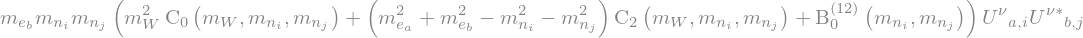

In [15]:
AL1[C[i,j]].collect(triangleGninj.Cs).simplify()/A

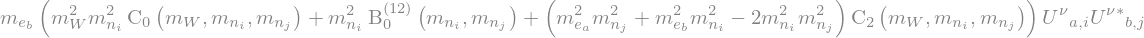

In [16]:
AL1[Cc[i,j]].collect(triangleGninj.Cs).simplify()/A

In [17]:
AR1 = triangleGninj.AR().subs({lfvhd.mi:mea,lfvhd.mj:meb}).expand().collect([C[i,j],Cc[i,j]],evaluate=False)

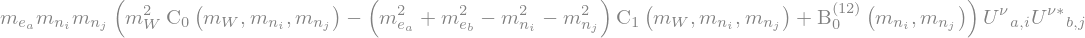

In [18]:
AR1[C[i,j]].collect(triangleGninj.Cs).simplify()/A

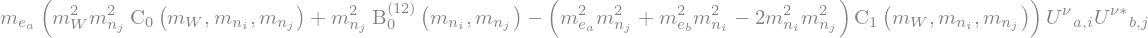

In [19]:
AR1[Cc[i,j]].collect(triangleGninj.Cs).simplify()/A

### Triangle Wninj

This is the diagram 2 of our reference

In [49]:
triangleWninj = lfvhd.TriangleVFF(vertexhninj,vertexebnjWd,vertexnieaWu,[mW,mni,mnj])

In [53]:
AL2 =  triangleWninj.AL().subs(lfvhd.D,4).subs({lfvhd.mi:mea,lfvhd.mj:meb}).expand().collect([C[i,j],Cc[i,j]],evaluate=False)

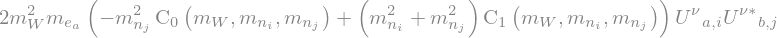

In [55]:
AL2[C[i,j]].collect(triangleGninj.Cs).simplify()/A

In [56]:
AL2[Cc[i,j]].collect(triangleGninj.Cs).simplify()/A

In [57]:
AR2 = triangleWninj.AR().subs(lfvhd.D,4).subs({lfvhd.mi:mea,lfvhd.mj:meb}).expand().collect([C[i,j],Cc[i,j]],evaluate=False)

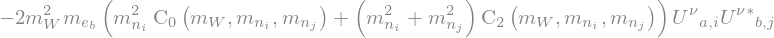

In [59]:
AR2[C[i,j]].collect(triangleGninj.Cs).simplify()/A

In [60]:
AR2[Cc[i,j]].collect(triangleGninj.Cs).simplify()/A

### Triangle niWW

This is the diagram 3 of our reference

In [61]:
vertexebniWd = lfvhd.VertexVFF(0,I*g/sqrt(2)*conjugate(Uν[b,i]))

In [62]:
triangleniWW = lfvhd.TriangleFVV(vertexhWW,vertexebniWd,vertexnieaWu,[mni,mW,mW])

In [63]:
mh = symbols('m_h',real=True)
masas_hab = {lfvhd.mi:mea,lfvhd.mj:meb,lfvhd.ma:mh}

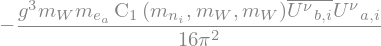

In [64]:
triangleniWW.AL().subs(lfvhd.D,4).subs(masas_hab)

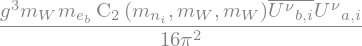

In [65]:
triangleniWW.AR().subs(lfvhd.D,4).subs(masas_hab)

### Triangle niWG

This is the diagram 4 of our reference

In [41]:
vertexebniGd = lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mni*conjugate(Uν[b,i]),
                               (-I*g)/(sqrt(2)*mW)*meb*conjugate(Uν[b,i]))

In [42]:
triangleniWG = lfvhd.TriangleFVS(vertexhWG,vertexebniGd,vertexnieaWu,[mni,mW,mW])

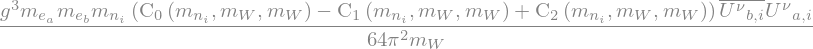

In [43]:
triangleniWG.AL().subs(lfvhd.D,4).subs(masas_hab).collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify)

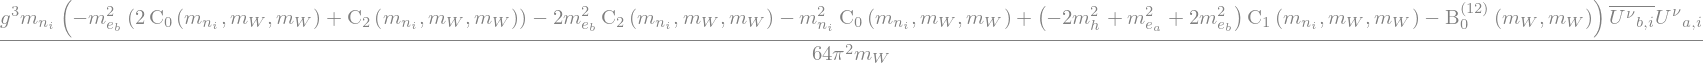

In [44]:
triangleniWG.AR().subs(lfvhd.D,4).subs(masas_hab).collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify)

### Triangle niGW

This is the diagram 5 of our reference

In [45]:
triangleniGW = lfvhd.TriangleFVS(vertexhGW,vertexebniWd,vertexnieaGu,[mni,mW,mW])

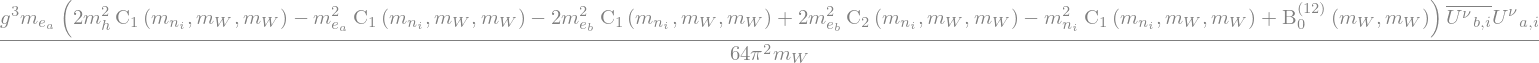

In [46]:
triangleniGW.AL().subs(lfvhd.D,4).subs(masas_hab).expand().collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify).factor()

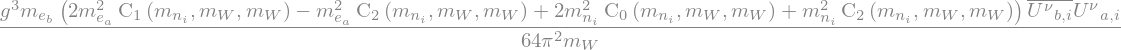

In [47]:
triangleniGW.AR().subs(lfvhd.D,4).subs(masas_hab).expand().collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify).factor()

### Triangle niGG

This is the diagram 6 of our reference

In [48]:
triangleniGG = lfvhd.TriangleFSS(vertexhGG,vertexnieaGu,vertexebniGd,[mni,mW,mW])

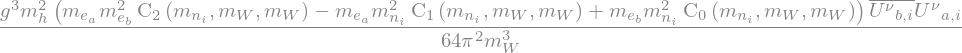

In [49]:
triangleniGG.AL().subs(masas_hab).expand().collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify).factor()

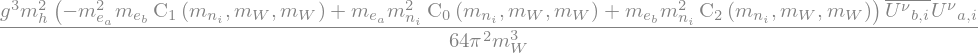

In [50]:
triangleniGG.AR().subs(masas_hab).expand().collect([lfvhd.C0(mni,mW,mW),lfvhd.C1(mni,mW,mW),lfvhd.C2(mni,mW,mW)],simplify).factor()

### Bubble niW

This is the diagram 7 of our reference

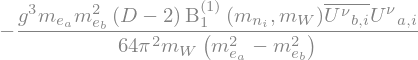

In [51]:
bubbleniW = lfvhd.BubbleFV(vertexhee(meb),vertexebniWd,vertexnieaWu,[mni,mW])
bubbleniW.AL().subs(masas_hab)#.subs(lfvhd.D,4)

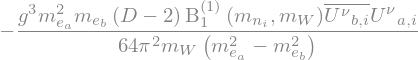

In [52]:
bubbleniW.AR().subs(masas_hab)

### Bubble Wni

This is the diagram 9 of our reference

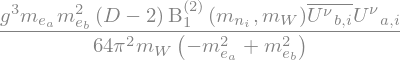

In [53]:
bubbleWni = lfvhd.BubbleVF(vertexhee(mea),vertexebniWd,vertexnieaWu,[mni,mW])
bubbleWni.AL().subs(masas_hab)

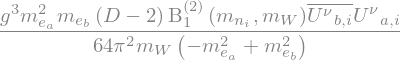

In [54]:
bubbleWni.AR().subs(masas_hab)

**Adding bubble niW y Wni**

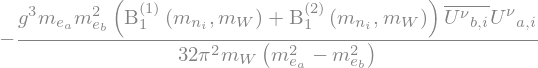

In [55]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).subs(masas_hab).simplify()
BniW_L

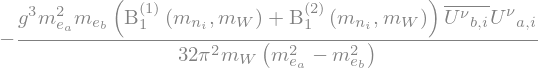

In [56]:
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).subs(masas_hab).simplify()
BniW_R

### Bubble niG

This is the diagram 8 of our reference

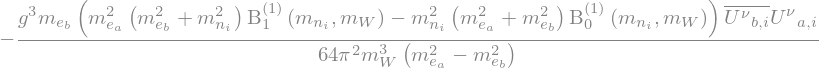

In [57]:
bubbleniG = lfvhd.BubbleFS(vertexhee(meb),vertexebniGd,vertexnieaGu,[mni,mW])
bubbleniG.AL().subs(masas_hab).collect([
    lfvhd.B1_0(mni,mW),lfvhd.B1_1(mni,mW)]).simplify()

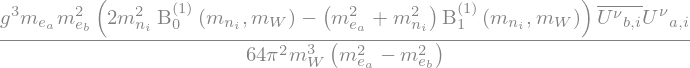

In [58]:
bubbleniG.AR().subs(masas_hab).collect([
    lfvhd.B1_0(mni,mW),lfvhd.B1_1(mni,mW)]).simplify()

### Bubble Gni

This is the diagram 10 of our reference

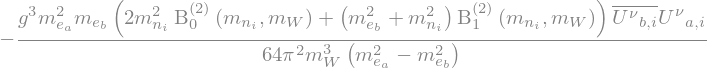

In [59]:
bubbleGni = lfvhd.BubbleSF(vertexhee(mea),vertexebniGd,vertexnieaGu,[mni,mW])
bubbleGni.AL().subs(masas_hab).collect([
    lfvhd.B2_0(mni,mW),lfvhd.B2_1(mni,mW)]).simplify()

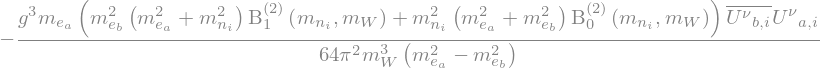

In [60]:
bubbleGni.AR().subs(masas_hab).collect([
    lfvhd.B2_0(mni,mW),lfvhd.B2_1(mni,mW)]).simplify()

**Adding bubble niG y Gni**

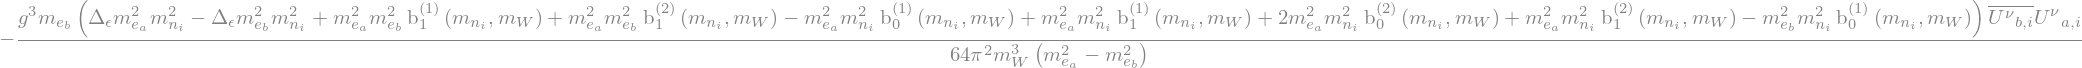

In [66]:
BniG_L =  (bubbleniG.AL() + bubbleGni.AL()).subs(lfvhd.D,4).subs(masas_hab).simplify()
BniG_L.subs(lfvhd.cambiosDivFin(mni,mW,mW)).simplify()

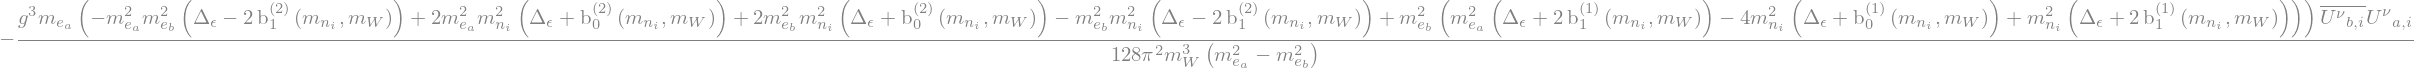

In [67]:
BniG_R =  (bubbleniG.AR() + bubbleGni.AR()).subs(lfvhd.D,4).subs(masas_hab).simplify()
BniG_R.subs(lfvhd.cambiosDivFin(mni,mW,mW)).simplify()